# Underwater analysis of feature detectors

Some methods needed for analysis:

In [26]:
def read_segmentation_results(paths):
    all_feature_counts = []
    all_percentages = []
    all_time_counts = []

    for i in range(number_of_tests):
        feature_counts = []
        percentages = []
        time_counts = []
    
        with open(paths[i], mode ='r')as file:
            csvFile = csv.reader(file)
            line_number = 0
            for lines in csvFile:
                # Skip first line
                if line_number != 0:
                    feature_counts.append(float(lines[2]))
                    percentages.append(float(lines[4]))
                    time_counts.append(float(lines[5]))
                line_number = line_number+1
        all_feature_counts.append(feature_counts)
        all_percentages.append(percentages)
        all_time_counts.append(time_counts)
    return all_feature_counts, all_percentages, all_time_counts

def clean_data(data):
    cleaned_data = []
    for i in range(len(data)):
        if data[i] >= 0:
            cleaned_data.append(data[i])
    return cleaned_data

## Sift test:

The first feature detector tested is sift. All the parameters are tested in terms of number of features found, number of features that match the segmented image as well as the time it takes to find the features. During testing only the 1000 best features where kept, due to the fact that too many features would make everything slower as well as make it harder to detect any specific shape amongst them.

### Contrast threshold tests:

The variable that had the most imediate influence on the number of features detected was experienced to be the contrast threshold.
It was therefore the first variable that was tested. The remaining variable where kept constant at their advised/default values. Those being:<br>
Layers: 3<br>
Edge threshold: 10<br>
Sigma: 1.6<br>
With precise upscaling disabled.<br>

The recorded data can be categorized into three categories. Those being clear video feeds of only pillars, pillars located within tanks and pillars located in crowded environments. The different parameters are tested on each of these categories.<br>

Three videos where categorized as containing only a pillar in an empty underwater environment. From these a total of 150 frames, where taken and segmented for these tests. The frames where taken at an equal interval ensuring that frames from every part of the videos where used.<br>

Four videos where categorized as crowded environments, resulting in 200 frames being analysed. <br>

Three videos where categorized as being in a tank, resulting in 150 frames being analysed. <br>

The test therefore includes a total of 500 frames. <br>

Data is read:

In [33]:
import csv

# Paths
paths_clear = []
paths_match_clear = []
paths_crowded = []
paths_tank = []

# Other variables
number_of_tests = 11
contrast_thresholds = [0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.009, 0.008]

# Get all file paths
for i in range(number_of_tests):
    path_clear = '../Data/Sift/Clear_Dataset/contrast_test_'+ str(i) +'_results.csv'
    path_match_clear = '../Data/Sift/Clear_Dataset/'+str(i)+'_contrast_match_results.csv'
    path_crowded = '../Data/Sift/Crowded_Dataset/contrast_test_'+ str(i) +'_results.csv'
    path_tank = '../Data/Sift/Tank_Dataset/contrast_test_'+ str(i) +'_results.csv'
    paths_clear.append(path_clear)
    paths_match_clear.append(path_match_clear)
    paths_crowded.append(path_crowded)
    paths_tank.append(path_tank)

# Extract desired information
all_feature_counts_clear, all_percentages_clear, all_time_counts_clear = read_segmentation_results(paths_clear)
all_feature_counts_crowded, all_percentages_crowded, all_time_counts_crowded = read_segmentation_results(paths_crowded)
all_feature_counts_tank, all_percentages_tank, all_time_counts_tank = read_segmentation_results(paths_tank)

The first data of interest is the number of samples usable for each test. This is due to one of the test criteria being a percentage, which means samples with zero features present no valid percentage for analysis. Total samples, valid samples, contrast threshold and environment are therefore showcased in below table:

In [53]:
from tabulate import tabulate, SEPARATING_LINE

# remove -1 elements as it is the representation of N/A and count valid samples
valid_samples_percentages_clear = []
valid_samples_percentages_crowded = []
valid_samples_percentages_tank = []
all_percentages_clear_clean = []
all_percentages_crowded_clean = []
all_percentages_tank_clean = []

for i in range(len(all_percentages_clear)):
    clean_temp = clean_data(all_percentages_clear[i])
    all_percentages_clear_clean.append(clean_temp)
    valid_samples_percentages_clear.append(len(all_percentages_clear_clean[i]))
    
for i in range(len(all_percentages_crowded)):
    clean_temp = clean_data(all_percentages_crowded[i])
    all_percentages_crowded_clean.append(clean_temp)
    valid_samples_percentages_crowded.append(len(all_percentages_crowded_clean[i]))

for i in range(len(all_percentages_tank)):
    clean_temp = clean_data(all_percentages_tank[i])
    all_percentages_tank_clean.append(clean_temp)
    valid_samples_percentages_tank.append(len(all_percentages_tank_clean[i]))

# Create headers
headers = ["contrast threshold","valid samples", "total samples", "percentage valid"]

# Prepare table data
table_data = [[],[],[]]
enviroments = ["Clear", "Crowded", "Tank"]
valid_environments = [valid_samples_percentages_clear, valid_samples_percentages_crowded, valid_samples_percentages_tank]
complete_environments = [all_percentages_clear,all_percentages_crowded,all_percentages_tank]
for i in range(len(enviroments)):
    row = []
    for j in range(len(contrast_thresholds)):
        row = [contrast_thresholds[j],valid_environments[i][j],len(complete_environments[i][j]),(valid_environments[i][j]/len(complete_environments[i][j]))*100.0]
        table_data[i].append(row)

#display table
for i in range(len(enviroments)):
    print(enviroments[i]+":")
    print(tabulate(table_data[i], headers=headers,tablefmt="heavy_grid", numalign="right", floatfmt=".2f"))

Clear:
┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃   contrast threshold ┃   valid samples ┃   total samples ┃   percentage valid ┃
┣━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃                 0.09 ┃              46 ┃             150 ┃              30.67 ┃
┣━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃                 0.08 ┃              61 ┃             150 ┃              40.67 ┃
┣━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃                 0.07 ┃              73 ┃             150 ┃              48.67 ┃
┣━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃                 0.06 ┃              94 ┃             150 ┃              62.67 ┃
┣━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃                 0.05 ┃             111 ┃             150 ┃              74.00 ┃
┣━━━━━━━━

From these tables it can be seen that the clear dataset experience a big decrease in valid data samples, the higher the contrast threshold goes. This is due to many cases, where zero features are found. Since division by zero is illegal, the percentage results are invalid for these samples. This shows a very clear problem with using high value contrast thresholds in clear environments, but also means that the sample sizes will be skewed, when it comes to percentage measurements in the up comming analysis. The clear tests are also at some contrast threhsholds close to having a not statistical significant sample size (around 30 samples).<br>

The median, 25% and 75% percentile are now analysed for the three evaluation categories, that being features found, time taken, and percentage of features within segmented area. 

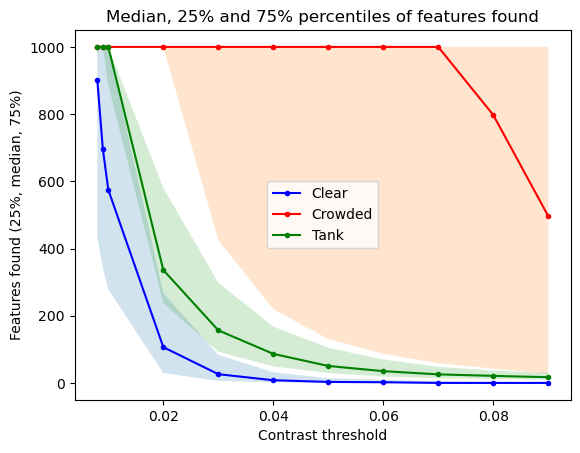

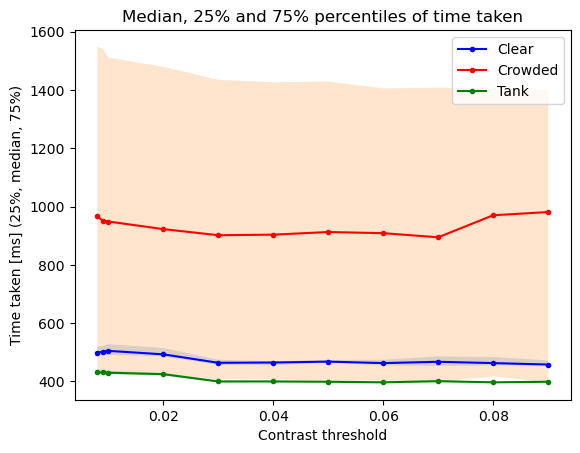

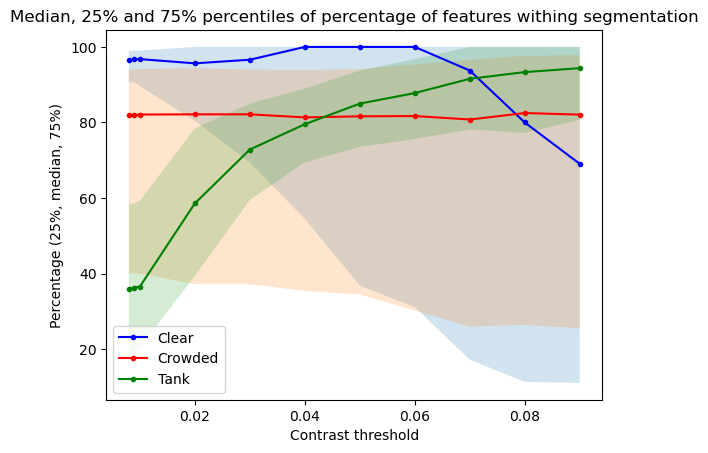

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import statistics 

# Find medians and quantiles
medians = []
percentiles_25 = []
percentiles_75 = []

feature_environments = [all_feature_counts_clear,all_feature_counts_crowded,all_feature_counts_tank]
time_environments = [all_time_counts_clear,all_time_counts_crowded,all_time_counts_tank]
percentage_environments = [all_percentages_clear_clean,all_percentages_crowded_clean,all_percentages_tank_clean]

for i in range(len(enviroments)):
    feature_medians = []
    feature_percentiles_25 = []
    feature_percentiles_75 = []
    time_medians = []
    time_percentiles_25 = []
    time_percentiles_75 = []
    percentage_medians = []
    percentage_percentiles_25 = []
    percentage_percentiles_75 = []
    
    for j in range(number_of_tests):     
        feature_medians.append(statistics.median(feature_environments[i][j]))
        feature_percentiles_25.append(np.percentile(feature_environments[i][j], 25))
        feature_percentiles_75.append(np.percentile(feature_environments[i][j], 75))
        
        time_medians.append(statistics.median(time_environments[i][j]))
        time_percentiles_25.append(np.percentile(time_environments[i][j], 25))
        time_percentiles_75.append(np.percentile(time_environments[i][j], 75))
        
        percentage_medians.append(statistics.median(percentage_environments[i][j]))
        percentage_percentiles_25.append(np.percentile(percentage_environments[i][j], 25))
        percentage_percentiles_75.append(np.percentile(percentage_environments[i][j], 75))

    medians.append([feature_medians,time_medians,percentage_medians])
    percentiles_25.append([feature_percentiles_25,time_percentiles_25,percentage_percentiles_25])
    percentiles_75.append([feature_percentiles_75,time_percentiles_75,percentage_percentiles_75])

# Data structure: environment -> test category -> contrast threshold setting

# Number of features is plotted
plt.plot(contrast_thresholds,medians[0][0],marker='.',color='b',label="Clear")
plt.fill_between(contrast_thresholds, percentiles_25[0][0],percentiles_75[0][0], alpha=0.2)

plt.plot(contrast_thresholds,medians[1][0],marker='.',color='r',label="Crowded")
plt.fill_between(contrast_thresholds, percentiles_25[1][0],percentiles_75[1][0], alpha=0.2)

plt.plot(contrast_thresholds,medians[2][0],marker='.',color='g',label="Tank")
plt.fill_between(contrast_thresholds, percentiles_25[2][0],percentiles_75[2][0], alpha=0.2)

plt.xlabel('Contrast threshold')
plt.ylabel('Features found (25%, median, 75%)')
plt.title('Median, 25% and 75% percentiles of features found')
plt.legend()
plt.show()


# Time taken is plotted
plt.plot(contrast_thresholds,medians[0][1],marker='.',color='b',label="Clear")
plt.fill_between(contrast_thresholds, percentiles_25[0][1],percentiles_75[0][1], alpha=0.2)

plt.plot(contrast_thresholds,medians[1][1],marker='.',color='r',label="Crowded")
plt.fill_between(contrast_thresholds, percentiles_25[1][1],percentiles_75[1][1], alpha=0.2)

plt.plot(contrast_thresholds,medians[2][1],marker='.',color='g',label="Tank")
plt.fill_between(contrast_thresholds, percentiles_25[2][1],percentiles_75[2][1], alpha=0.2)

plt.xlabel('Contrast threshold')
plt.ylabel('Time taken [ms] (25%, median, 75%)')
plt.title('Median, 25% and 75% percentiles of time taken')
plt.legend()
plt.show()

# Percentage is plotted
plt.plot(contrast_thresholds,medians[0][2],marker='.',color='b',label="Clear")
plt.fill_between(contrast_thresholds, percentiles_25[0][2],percentiles_75[0][2], alpha=0.2)

plt.plot(contrast_thresholds,medians[1][2],marker='.',color='r',label="Crowded")
plt.fill_between(contrast_thresholds, percentiles_25[1][2],percentiles_75[1][2], alpha=0.2)

plt.plot(contrast_thresholds,medians[2][2],marker='.',color='g',label="Tank")
plt.fill_between(contrast_thresholds, percentiles_25[2][2],percentiles_75[2][2], alpha=0.2)

plt.xlabel('Contrast threshold')
plt.ylabel('Percentage (25%, median, 75%)')
plt.title('Median, 25% and 75% percentiles of percentage of features withing segmentation')
plt.legend()
plt.show()

The results show that the feature detector performs very differently depending on area type. Crowded areas produce the most amount of features at the cost of some accuracy in terms of percentage of features within the desired areas (pillars and protruding edges). It is also crowded areas that produce the most spread in terms of all test categories, most likely due to how different the crowded environments are to eachother compared to the more identical clear and tank environments. It is also the environment that seems the most stable in terms of features being located within the segmented areas, most likely due to the more spread distribution of features, due to various textures. It would therefore be beneficial to have high contrast thresholds in crowded environments since the removed features  dont seem to affect the median match percentage in a negative way.<br>

The tank environment sees the least amount of spread, most likely due to all the test environments being located within the same type of tank. It furthermore performs better in terms of feature count compared to the clear datasets. Reasons for this could be impurities in the concrete walls, the different color of the pipes (blue) or the increased clarity of the water. Looking at the segmentation results, it can be seen that the performance is increased with the increase in contrast threshold (and thus smaller amount of features). This indicate that only a couple of features are located on the pipes, but that these features are very clear. When decreasing the threshold more features will be found, but these will lie in the impurities of the background instead of on the desired pipes. The tank environment also seem to perform the fastest, even though more features are found. This might be due to the simplicity of the more static environment, or some difference in image sizes, which will be explored later. High contrast thresholds are therefore desired in tank environments, while still ensuring that a good amount of features are found. <br>

The clear environment clearly performs the worst in terms of feature counts, with many contrast threshold being unusable due to the tiny or no amount of features found. The results also indicate that the few features found at high contrast thresholds are likely to lie outside the desired areas. Only few features are however of high quality in the background, and thus increasing the amount of features found will increase the percentage of features being located as desired. This is in stark contrast to the tank environment. Low contrast thresholds are desired for clear environments, since it mostly just adds features in the desired areas.<br>

If only tank environment exists, a contrast threshold of 0.04 - 0.06 would probably be best, since it results in high segmentation match percentage, while still containing some features to work with.<br>

If only clear environments exists, a contrast threshold of 0.02-0.03 would be best, since high segmentation matching is present, while the feature count is not completly in the gutter. <br>

For this reasing it would be best to use either 0.03 or 0.04 in order to have high performance in all environments, while keeping the feature count existent for all environments. One would just have to keep fewer features in the complex environments. <br>

For future testing a contrast threshold of 0.02 is used, since this allows for more features being present, thus making it easier to see the affect of other changes. But the final implementation will be using a contrast threshold of 0.03. <br>

Some histograms will now be explored to analyse the high spread of crowded dataset, as well as the percentage spread for the clear dataset.

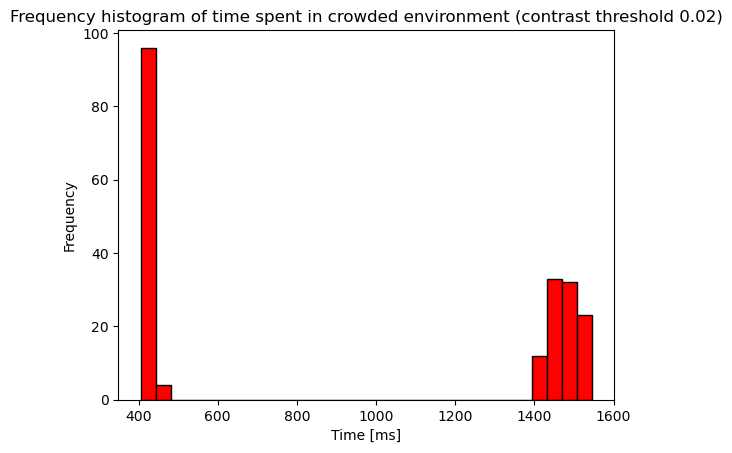

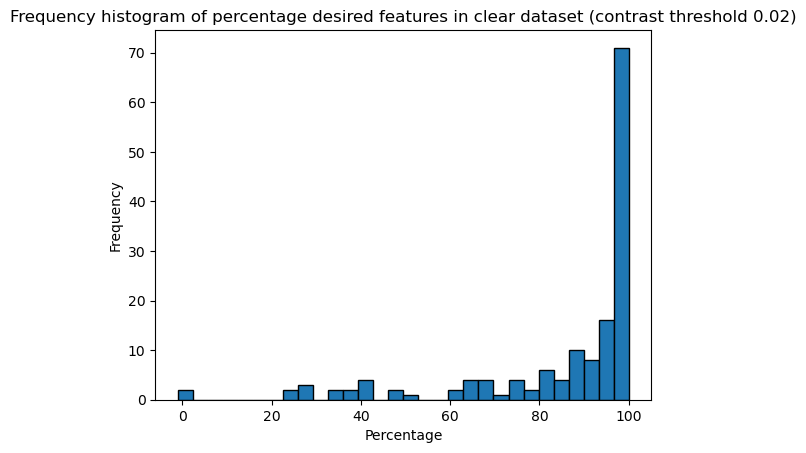

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# Feature histotgram for crowded time
n_bins = 30
plt.hist(all_time_counts_crowded[7] ,bins=n_bins,color='r', density=False,edgecolor='black')
plt.xlabel('Time [ms]')
plt.ylabel('Frequency')
plt.title('Frequency histogram of time spent in crowded environment (contrast threshold 0.02)')
plt.show()

# Feature histotgram for clear percentage
n_bins = 30
plt.hist(all_percentages_clear[7] ,bins=n_bins, density=False,edgecolor='black')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Frequency histogram of percentage desired features in clear dataset (contrast threshold 0.02)')
plt.show()



A clear difference is seen between the spread of the clear dataset, compared to that seen in the crowded dataset. There is a very clear cut between the low and high times in the crowded dataset, which indicates that something is different in the datasets. The difference was identified to be a difference in frame size between the crowded datasets. Two of which has a frame size of 2448 × 2058 (.mp4) and the other two having a frame size of 1920 × 1080 (.mkv). The clear data spread looks to be more consistent and have no difference in frame size. It is therefore likely just a result of some frames in the video feeds performing worse than others. <br>
Images of bad and good performance in the different environments can be seen bellow: